# MapReduce
MapReduce is a programming paradigm and an associated implementation for processing and generating big data sets with a parallel, distributed algorithm (often run on a cluster but not necessarily).

A MapReduce program is composed of a map procedure, which performs necessary computations on different data records, and a reduce method, which performs a summary operation (such as aggregating the computed quantities). 

The key contributions of the MapReduce framework are not the actual map and reduce functions but the scalability achieved for a variety of applications by optimizing the execution engine. As such, a single-threaded implementation of MapReduce is usually not much faster than a traditional (non-MapReduce) implementation; significant gains are usually only seen with multi-threaded implementations on multi-processor hardware.[[1]](#1)

In most cases, MapReduce framework is deployed on a cluster or cloud. You might have heard of MapReduce in the context of Hadoop or Spark. But actually, it could work locally as well and the parallel computing on multiple cores could be implemented using a multiprocessing module.

The general idea works as following: 
- the map computes a relevant feature of the data records to be processed 
- then the reduce summarizes those computed features into a target quantity of interest or selects the data based on their values

E.g. in the example below where we select the longest string by using map to compute the length of all the given strings and using reduce to pick the longest string. 

The key feature of reduce is that it collapses multiple data records into a single one and performs it iteratively; so that reducing a long list composed of a number of parts can be done by reducing each part first and then reducing the list of results for the parts into a single output.

This way both - map and reduce steps could be easily parallelized. Map for different records could be done separately in any order and the reduce could be performed in parallel for different parts of the list and then the results could be combined together. This way the code implemented using a MapReduce paradigm is suitable for parallel processing.

#### References
<a id="1">[1]</a> 
https://en.wikipedia.org/wiki/MapReduce#cite_note-1



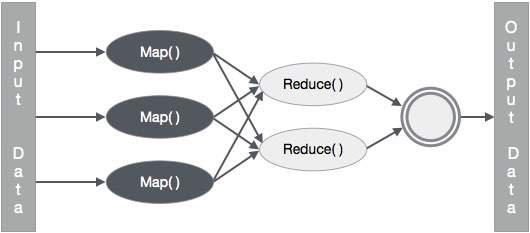

In [1]:
import urllib
from IPython.display import Image
from io import BytesIO
url = 'https://raw.githubusercontent.com/CUSP2021ADS/Data/main/labs_images/map_reduce_algorithm.jpg'
Image(urllib.request.urlopen(url).read())

# Map, Filter and Reduce functions in Python
The map(), filter(), and reduce() functions bring a bit of functional programming to Python. All three of these are convenience functions that can be replaced with List Comprehensions or loops, but provide a more elegant and short-hand approach to some problems. Besides, together they allow implementing a MapReduce paradigm in Python. BTW, Dask  also uses MapReduce technology in the backend. Although it does not require users to code the MapReduce part themselves, it runs on the backend, letting the users focus on the data analytics.

In [2]:
## A toy example: find the longest string
words = ['hadoop', 'mapreduce', 'spark', 'jupyter notebook', 'anaconda', 'python'] + ['a'] * 10 + ['bb'] * 10 + ['ccc'] * 10 

In [3]:
%%time
# in a for loop way
length = [len(i) for i in words]
words[length.index(max(length))]

CPU times: user 18 µs, sys: 2 µs, total: 20 µs
Wall time: 22.2 µs


'jupyter notebook'

In [4]:
# in a MapReduce way
from functools import reduce
def findLongest(p, c):
    if p[0] > c[0]:
        return p
    return c

In [5]:
%%time
reduce(findLongest,map(lambda x: [len(x),x], words))

CPU times: user 8 µs, sys: 1e+03 ns, total: 9 µs
Wall time: 10.7 µs


[16, 'jupyter notebook']

MapReduce runs faster compared to the list comprehension approach. Although as mentioned to see the real performance gain we'll need to use multiprocessing as introduced below. 

## Map
The map() function iterates through all items in the given iterable and executes the function we passed as an argument on each of them to produce a new iterable. Items in the new iterable are produced by calling the transformation function on each item in the original iterable.

In [6]:
def square(x):
    return x**2

In [7]:
%%time
_ = [square(i) for i in range(10000000)]

CPU times: user 1.75 s, sys: 34.9 ms, total: 1.79 s
Wall time: 1.79 s


In [8]:
%%time
_ = list(map(square,range(10000000)))

CPU times: user 1.63 s, sys: 48 ms, total: 1.67 s
Wall time: 1.67 s


## Filter
Similar to map(), filter() takes a function object and an iterable and creates a new list.

Filter function applies a predicate or Boolean-valued function to an iterable to generate a new iterable. Items in the new iterable are produced by filtering out any items in the original iterable that make the predicate function return false.

In [9]:
list(filter(lambda x:x%5==0, range(100)))

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

## Reduce
applies a reduction function (transforming two inputs into one single output) to an iterable to produce a single cumulative value. The reduce() function gets a function and a sequence as inputs and returns a single reduced value as an output. It works as follows:
- At the first step, the function is applied to the first two items from the sequence, returning the result; if an initial value is provided it is used instead without running the first step;
- At each of the following steps, the function is called with the result obtained on the previous step 1 and the next value in the sequence;
- This process runs until there are no more items in the sequence to process.

The syntax of the reduce() function is as follows: reduce(function, sequence[, initial]) -> value

In [10]:
from functools import reduce

In [11]:
%%time
# sum of range 999999
reduce(lambda x,y: x+y, range(999999))

CPU times: user 50.8 ms, sys: 0 ns, total: 50.8 ms
Wall time: 50.6 ms


499998500001

In [12]:
# get function in dictionary
testDict = {}
# if we are trying to retrieve a value by a key which is not exsit in the dictionary, 
# using get to define is the key is not exsit, what value we want to return
testDict.get('unknown',0)

0

Here is a list of names and grades, we want to first aggregate all the records from one person into one list, for example [['Tom'],[90,67,62]]. Then we want to compute an average grade for Tom.

In [13]:
grades = [
    ['Tom',90],
    ['Sam',88],
    ['Amy',78],
    ['Lucy',92],
    ['Tom',67],
    ['Sam',73],
    ['Amy',89],
    ['Lucy',98],
    ['Tom',62],
]

In [14]:
def gradeList(result,record):
    name, grade = record[0],record[1]
    result[name] = result.get(name,[]) + [grade]
    return result

In [15]:
'''
reduce(fuction, sequence, initial)
function is the function we defined before, gradeList
sequence is the list of names and grades
initial is the initial of result in the gradeList function, we initiate is as an empty dictionary
'''
reduce(gradeList,grades,{})

{'Tom': [90, 67, 62], 'Sam': [88, 73], 'Amy': [78, 89], 'Lucy': [92, 98]}

In [16]:
# use map and reduce together to calculate the average grade for each student
def averageGrade(record):
    name, grades = record[0], record[1]
    return [name, sum(grades)/len(grades)]

In [17]:
# we need to convert result from reduce to a list as only iterative series are acceptable in the map function
list(map(averageGrade,list(reduce(gradeList,grades,{}).items())))

[['Tom', 73.0], ['Sam', 80.5], ['Amy', 83.5], ['Lucy', 95.0]]

## Multiprocessing

multiprocessing is a package that supports spawning processes using an API similar to the threading module. The multiprocessing module also introduces APIs which do not have analogs in the threading module. A prime example of this is the Pool object which offers a convenient means of parallelizing the execution of a function across multiple input values, distributing the input data across processes (data parallelism).

The pool allows you to do multiple jobs per process, which may make it easier to parallelize your program. If you have a million tasks to execute in parallel, you can create a Pool with a number of processes as many as CPU cores and then pass the list of the million tasks to pool.map. The pool will distribute those tasks to the worker processes(typically the same in number as available cores) and collects the return values in the form of a list and pass it to the parent process. 

In [18]:
from multiprocessing import Pool

In [19]:
%%time
_ = list(map(square,range(10000000)))

CPU times: user 1.58 s, sys: 108 ms, total: 1.69 s
Wall time: 1.69 s


In [20]:
%%time
# using 8 cores in CPU
with Pool(8) as p:
    result = list(p.map(square,range(10000000)))
    p.close()

CPU times: user 698 ms, sys: 264 ms, total: 963 ms
Wall time: 1.07 s


## A real world data example
Map, filter, reduce could generate a pipeline of data engineering, especially for a big dataset that cannot be manipulated in Pandas. But instead of using the built-in map function in Python, we will use package multiprocessing to distribute our task to multiple cores in the CPU to achieve a faster computation. Besides, another important method, chunk,  will be applied as well. The chunk method is available in Pandas as well. It slices data into multi partitions and uses for loop to deal with only a part of the data in one iteration. 

In [21]:
import pandas as pd
import csv
from functools import reduce
from multiprocessing import Pool

Below an example of aggregating a sample of 2019 taxi data is provided. The dataset includes four variables: Type (yellow taxi, green taxi, for-hire-vehicle, and high volume for-hire-vehicle), time, pick up location, drop off location, and passenger count.

Objective: Aggregate the ridership of each type between each pair of taxi zones within each of the 30-minute intervals.

In [22]:
!wget -O 2019TaxiTest.csv https://github.com/CUSP2021ADS/Data/raw/main/2019TaxiTest.csv
taxi = pd.read_csv('2019TaxiTest.csv',nrows=5)
taxi

--2021-03-07 21:16:56--  https://github.com/CUSP2021ADS/Data/raw/main/2019TaxiTest.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CUSP2021ADS/Data/main/2019TaxiTest.csv [following]
--2021-03-07 21:16:56--  https://raw.githubusercontent.com/CUSP2021ADS/Data/main/2019TaxiTest.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17590719 (17M) [text/plain]
Saving to: ‘2019TaxiTest.csv’

2019TaxiTest.csv    100%[===================>]  16.78M  7.44MB/s    in 2.3s    

2021-03-07 21:16:59 (7.44 MB/s) - ‘2019TaxiTest.csv’ saved [17590719/17590719]



,Type,Time,PULocation,DOLocation,Count
0,FHVHV,2019-09-01 00:10:02,136,169,1
1,FHVHV,2019-09-01 00:22:37,169,18,1
2,FHVHV,2019-09-01 00:36:03,94,198,1
3,FHVHV,2019-09-01 00:04:04,114,112,1
4,FHVHV,2019-09-01 00:33:15,112,112,1


In [23]:
def returnInfo(record): #extract necessary fields from a data record (raw)
    return(record['Type'],record['Time'],record['PULocation'],record['DOLocation'],record['Count'])

def filterYear(record): #filter the records to keep only the year 2019
    # filter function must return True or False
    time = record[1]
    year = time.split(' ')[0].split('-')[0]
    if year == '2019':
        return True
    else:
        return False

def convert30min(record): #coarsen time into 30min intervals
    time = record[1]
    minute = time.split(' ')[1].split(':')[1]
    minute = int(int(minute)/30)*30
    time = time[:-5] + str(minute).zfill(2) + ':00'
    return (record[0],time ,record[2],record[3],record[4])

def sumPassenger(result,record): #add rides from a new record to the dictionary accumilating type-origin-destination-time ridership
    taxi, time, PU, DO, count = record[0], record[1], record[2], record[3], record[4]

    result[(taxi, time, PU, DO)] = result.get((taxi, time, PU, DO),0) + int(count)

    return result


In [24]:
with open('2019TaxiTest.csv', 'r') as fi: #with a given dataset
    reader = csv.DictReader(fi) #line-by-line data reader 
    output = list(map(lambda x: (x[0][0],x[0][1],x[0][2],x[0][3],x[1]), #convert to tuples
                      reduce(sumPassenger, #reduce records into an aggregated type-origin-destination-time-ridership dictionary
                             map(convert30min, #coarsen the time
                                 filter(filterYear, #keep only the records for 2019
                                 map(returnInfo,reader) #extract necessary fields from the records
                                 ),
                                ),
                             {}).items())) #initial value for the dictionary - {}

In [25]:
import pandas
pd.DataFrame(output, columns=['Taxi','Time','PULocation','DOLocation','Passenger'])

,Taxi,Time,PULocation,DOLocation,Passenger
0,FHVHV,2019-09-01 00:00:00,136,169,7
1,FHVHV,2019-09-01 00:00:00,169,18,1
2,FHVHV,2019-09-01 00:30:00,94,198,1
3,FHVHV,2019-09-01 00:00:00,114,112,1
4,FHVHV,2019-09-01 00:30:00,112,112,13
...,...,...,...,...,...
252200,FHVHV,2019-09-01 19:00:00,39,72,1
252201,FHVHV,2019-09-01 19:30:00,72,76,1
252202,FHVHV,2019-09-01 19:00:00,82,173,1
252203,FHVHV,2019-09-01 19:30:00,173,160,1


### break down
The first (most inner) function is a map function
```python
map(returnInfo,reader)
```
it is simply return selected values from the csv file. Let's check the output from the first function 

In [26]:
with open('2019TaxiTest.csv', 'r') as fi:
    reader = csv.DictReader(fi)
    output1 = list(map(returnInfo,reader))
output1[:3]

[('FHVHV', '2019-09-01 00:10:02', '136', '169', '1'),
 ('FHVHV', '2019-09-01 00:22:37', '169', '18', '1'),
 ('FHVHV', '2019-09-01 00:36:03', '94', '198', '1')]

The second function is a filter
```python
filter(filterYear, output1)
```
It is selecting output from the function, and the requirement is the year in date has to be 2019

In [27]:

output2 = list(filter(filterYear, output1))
output2[:3]

[('FHVHV', '2019-09-01 00:10:02', '136', '169', '1'),
 ('FHVHV', '2019-09-01 00:22:37', '169', '18', '1'),
 ('FHVHV', '2019-09-01 00:36:03', '94', '198', '1')]

The third function is a filter as well
```python
map(convert30min, output2)
```

Aggregate timestamp to 30 min interval. For example, 10:23 will be convert to 10:00, 11:59 will be convert to 11:30.

In [28]:
output3 = list(map(convert30min, output2))
output3[:3]

[('FHVHV', '2019-09-01 00:00:00', '136', '169', '1'),
 ('FHVHV', '2019-09-01 00:00:00', '169', '18', '1'),
 ('FHVHV', '2019-09-01 00:30:00', '94', '198', '1')]

The fourth function sum up passengers from the same type of taxi in the same temporal interval.
```python
reduce(sumPassenger,output3,{})
```

In [29]:
output4 = list(reduce(sumPassenger,output3,{}).items())
output4[:3]

[(('FHVHV', '2019-09-01 00:00:00', '136', '169'), 7),
 (('FHVHV', '2019-09-01 00:00:00', '169', '18'), 1),
 (('FHVHV', '2019-09-01 00:30:00', '94', '198'), 1)]

The last step is another map function: reorganize output.

```python
map(lambda x: (x[0],x[1][1]/x[1][0]),output4)
```

In [30]:
final = list(map(lambda x: (x[0][0],x[0][1],x[0][2],x[0][3],x[1]),output4))
final[:3]

[('FHVHV', '2019-09-01 00:00:00', '136', '169', 7),
 ('FHVHV', '2019-09-01 00:00:00', '169', '18', 1),
 ('FHVHV', '2019-09-01 00:30:00', '94', '198', 1)]

## Parallel computing
Parallel computing is a type of computation where many calculations or the execution of processes are carried out simultaneously. Large problems can often be divided into smaller ones, which can then be solved at the same time. Take the taxi data case as an example. In parallel computing, we should divide the dataset into multiple chunks and assign one chunk to each CPU core to do conduct map and filter functions. Results from map and filter will be aggregated to one core to do reduce. In this way, our computing works much faster.

To implement a parallel computing MapReduce workflow, we need a package, multiprocessing, to achieve it.

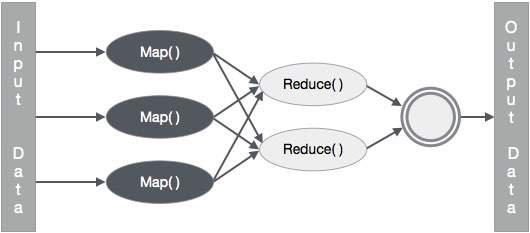

In [31]:
url = 'https://raw.githubusercontent.com/CUSP2021ADS/Data/main/labs_images/map_reduce_algorithm.jpg'
Image(urllib.request.urlopen(url).read())

In [32]:
import multiprocessing
# use 6 cores
pool = multiprocessing.Pool(6)
# instead of calling the built-im map function in Python
# we are using map from multiprocessing pool
with open('2019TaxiTest.csv', 'r') as fi:
    reader = csv.DictReader(fi)
    output = list(reduce(sumPassenger,
                             pool.map(convert30min,
                                 pool.map(returnInfo,reader)      
                                ),
                             {}).items())
    pool.close()

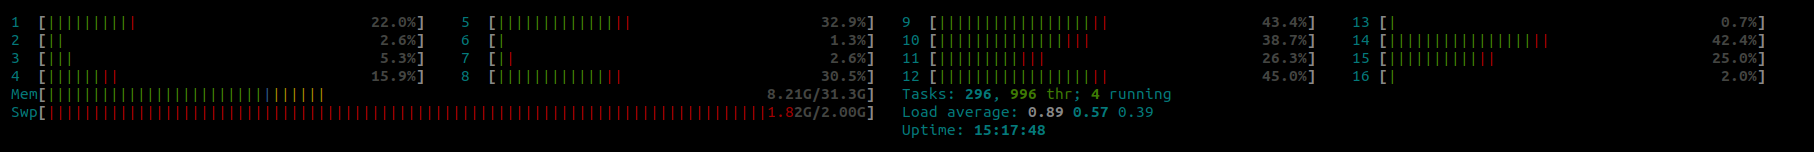

In [33]:
# be checking the CPU utilization, 
# it is clear that more cores are working togeter when the parallel computing is runing
url = 'https://raw.githubusercontent.com/CUSP2021ADS/Data/main/labs_images/multi.png'
Image(urllib.request.urlopen(url).read())

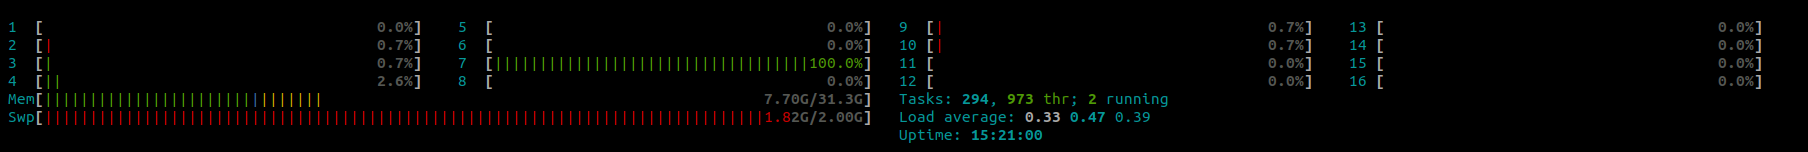

In [34]:
url = 'https://raw.githubusercontent.com/CUSP2021ADS/Data/main/labs_images/single.png'
Image(urllib.request.urlopen(url).read())

## Chunk

Besides computing speed, another issue bothering us the most is the memory size. Usually, a laptop's memory is 8GB which means we cannot manipulate an 8GB dataset. We can slice the whole dataset into multiple chunks and conducting only one chunk in one iteration. Chunk function is available in pandas as well.

In [35]:
# take an only 50 lines csv file as an example
# 10 lines in each chunk
chunksize = 10
!wget -O 2019TaxiTest1.csv https://raw.githubusercontent.com/CUSP2021ADS/Data/main/2019TaxiTest1.csv
    
with open('2019TaxiTest1.csv', 'r') as fi:
    reader = csv.DictReader(fi)
    chunk = []
    for i, line in enumerate(reader):
        if (i % chunksize == 0 and i > 0):
            print('----------------------')
            print(i,chunk)
            del chunk[:]  # or: chunk = []
        chunk.append(line)
    print('----------------------')
    print(i,chunk)

--2021-03-07 21:17:07--  https://raw.githubusercontent.com/CUSP2021ADS/Data/main/2019TaxiTest1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1797 (1.8K) [text/plain]
Saving to: ‘2019TaxiTest1.csv’

2019TaxiTest1.csv   100%[===================>]   1.75K  --.-KB/s    in 0s      

2021-03-07 21:17:07 (14.2 MB/s) - ‘2019TaxiTest1.csv’ saved [1797/1797]

----------------------
10 [OrderedDict([('Type', 'FHVHV'), ('Time', '2019-09-01 00:10:02'), ('PULocation', '136'), ('DOLocation', '169'), ('Count', '1')]), OrderedDict([('Type', 'FHVHV'), ('Time', '2019-09-01 00:22:37'), ('PULocation', '169'), ('DOLocation', '18'), ('Count', '1')]), OrderedDict([('Type', 'FHVHV'), ('Time', '2019-09-01 00:36:03'), ('PULocation', '94'), ('DOLocation', '198'), ('Count', '1')])

### Combine chunk together with MapReduce

In [36]:
with open('2019TaxiTest.csv', 'r') as fi:
    reader = csv.DictReader(fi)
    chunk = []
    result = []
    # read 100000 rows in each chunk
    chunksize = 100000
    pool = Pool(8)
    for i, line in enumerate(reader):
        
        if (i % chunksize == 0 and i > 0):
            # MapReduce function for rows in one chunk
            output = list(reduce(sumPassenger,
                         pool.map(convert30min,
                             pool.map(returnInfo,chunk)
                            ),
                         {}).items())
            result += output
            chunk = []
            
        
        # add lines to chunk, and when the index
        # is 100000, 200000, etc, stop adding new lines
        # and start MapReduce functions
        chunk.append(line)
        
    # MapReduce function for the last chunk
    output = list(reduce(sumPassenger,
                         pool.map(convert30min,
                             pool.map(returnInfo,chunk)
                            ),
                         {}).items())
    result += output
    pool.close()

In [37]:
result[:3]

[(('FHVHV', '2019-09-01 00:00:00', '136', '169'), 7),
 (('FHVHV', '2019-09-01 00:00:00', '169', '18'), 1),
 (('FHVHV', '2019-09-01 00:30:00', '94', '198'), 1)]

#### reduce results from different reducer
as different chunks may have overlapping type, type, origin, destination values introduce one final reducer to aggregate the ridership between the results of different chunks. ch final aggregation is often needed when using MapReduce over different chunks of data and in general the MapReduce architecture often organizes reductions in a hierarchical manner, which is possible whenever the order of reduction operations does not matter

In [38]:
def reduceResults(result,record): #add rides from a new record to the dictionary accumilating type-origin-destination-time ridership
    taxi, time, PU, DO, count = record[0][0], record[0][1], record[0][2], record[0][3], record[1]

    result[(taxi, time, PU, DO)] = result.get((taxi, time, PU, DO),0) + int(count)

    return result

In [51]:
list(reduce(reduceResults,result,{}).items())[:3]

[(('FHVHV', '2019-09-01 00:00:00', '136', '169'), 7),
 (('FHVHV', '2019-09-01 00:00:00', '169', '18'), 1),
 (('FHVHV', '2019-09-01 00:30:00', '94', '198'), 1)]

This is the basic concept of how to process big data in a Pythonic and scalable way. But in practice we often don't apply built-in map and reduce functions to deal with datasets directly. As even we could use the multiprocessing and chunk iteration to implement parallel and scalable computing, it is still unable to employ all resources of a computer into one task.

Instead, the best choice for big data processing in Python is PySpark. PySpark is the Python API written in Python to support Apache Spark. Apache Spark is a distributed framework that can handle Big Data analysis. Apache Spark is written in Scala and can be integrated with Python, Scala, Java, R, SQL languages. Spark is basically a computational engine, that works with huge sets of data by processing them in parallel and batch systems.

The basic logistic of PySpark is quite similar to the workflow we introduced before, but it is faster. And as it provides pre-defined APIs, it also needs less coding work.

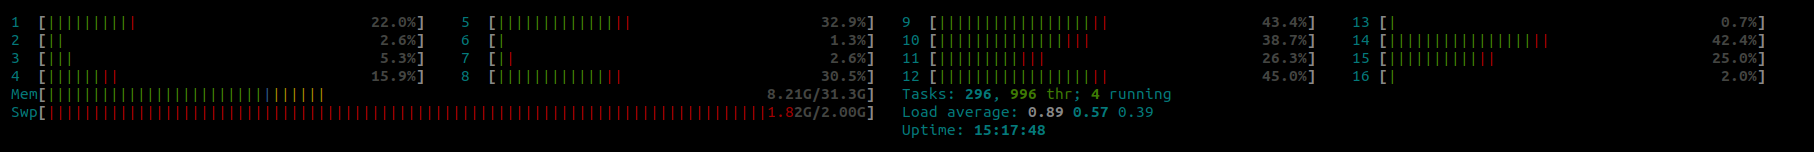

In [40]:
url = 'https://raw.githubusercontent.com/CUSP2021ADS/Data/main/labs_images/multi.png'
Image(urllib.request.urlopen(url).read())

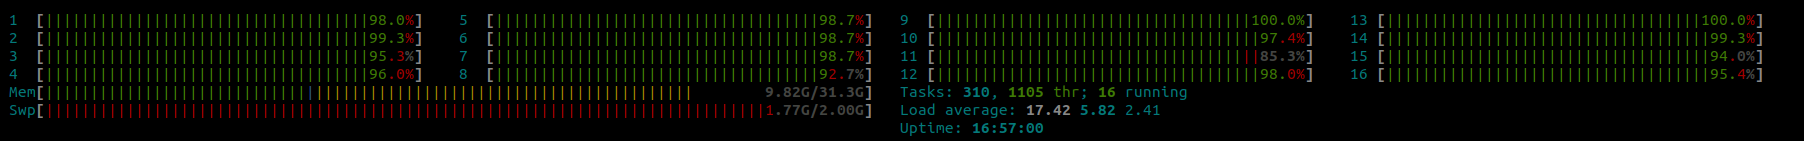

In [41]:
url = 'https://raw.githubusercontent.com/CUSP2021ADS/Data/main/labs_images/pyspark.png'
Image(urllib.request.urlopen(url).read())

This is a screenshot of CPU utilization when a PySpark program is running. It is clear that all threads are working, and all of them are almost 100\% used. Comparing with the CPU utilization of a hand-coded multi-process MarReduce, the utilization increased significantly. In other words, PySpark program could employ more power from the CPU.

## Parallel computing with Multiprocessing

Parallel computing is a useful enchancement to improve efficiency of your code. However sometimes it does require some computation design to be run properly, especially when the processes are not fully independent and share resources. Let's illustrate the process and associated challenges/solutions on the following example

In [42]:
#define a function implementing a computation process (summing up numbers from 1 to n-1)
import time
def processFunction(n):
    starttime=time.time() #measure execution time
    S=0
    for i in range(n):
        S+=i
    stoptime=time.time() 
    #S=sum([i for i in range(n)])
    print ('Computing for %d finalized with result %d; finalized in %.6f sec'%(n,S,stoptime-starttime))
    return S

args = [10000000,100000,1,100] #arguments to pass to the computation processes

for a in args: #launch all processes
     processFunction(a) 

Computing for 10000000 finalized with result 49999995000000; finalized in 0.287832 sec
Computing for 100000 finalized with result 4999950000; finalized in 0.002744 sec
Computing for 1 finalized with result 0; finalized in 0.000001 sec
Computing for 100 finalized with result 4950; finalized in 0.000003 sec


Now try running them as processes to be executed in parallel

In [43]:
#define a function implementing a computation process (summing up numbers from 1 to n-1)
import multiprocessing
def processFunction(n):
    starttime=time.time()
    S=0
    for i in range(n):
        S+=i
    stoptime=time.time() 
    #S=sum([i for i in range(n)])
    print ('Computing for %d finalized with result %d; finalized in %.6f sec'%(n,S,stoptime-starttime))
    return S

args = [10000000,100000,1,100] #arguments to pass to the computation processes

for a in args: #launch all processes
    p = multiprocessing.Process(target=processFunction, args=(a,)) #create a process
    p.start() #start a process

Computing for 100000 finalized with result 4999950000; finalized in 0.003070 sec
Computing for 1 finalized with result 0; finalized in 0.000001 sec
Computing for 100 finalized with result 4950; finalized in 0.000005 sec
Computing for 10000000 finalized with result 49999995000000; finalized in 0.299209 sec


As we can see the processes do not finalize in the order they were launched. Instead the fastest ones finalize first. So they were indeed launched in parallel, not sequencially.

However processes often do not run in isolation, like in the example above. It is often useful to share resources between them. Consider processes incrementing a certain common value for a certain number of times

In [44]:
def processFunction(n,S):
    starttime=time.time()
    for i in range(n):
        S.value+=1
    stoptime=time.time() 
    print ('Computing for %d finalized with result %d; finalized in %.6f sec'%(n,S.value,stoptime-starttime))
    return S.value
    

args = [1000000,100000,1,100] #arguments to pass to the computation processes


S=multiprocessing.Value('i', 0)

for a in args: #launch all processes
    p = multiprocessing.Process(target=processFunction, args=(a,S))
    p.start()

S.value

Computing for 1 finalized with result 28802; finalized in 0.000024 sec


35830

Computing for 100 finalized with result 36424; finalized in 0.000190 sec
Computing for 100000 finalized with result 77929; finalized in 0.131448 sec
Computing for 1000000 finalized with result 988607; finalized in 0.590338 sec


In [45]:
def processFunction(n,S,l):
    starttime=time.time()
    for i in range(n):
        l.acquire()
        S.value+=1
        l.release()
    stoptime=time.time() 
    print ('Computing for %d finalized with result %d; finalized in %.6f sec'%(n,S.value,stoptime-starttime))
    return S.value
    

args = [1000000,100000,1,100] #arguments to pass to the computation processes

lock = multiprocessing.Lock()

S=multiprocessing.Value('i', 0)

for a in args: #launch all processes
    p = multiprocessing.Process(target=processFunction, args=(a,S,lock))
    p.start()

S.value

Computing for 1 finalized with result 24457; finalized in 0.000031 sec
Computing for 100 finalized with result 31291; finalized in 0.000344 sec


30562

Computing for 100000 finalized with result 220611; finalized in 0.282865 sec
Computing for 1000000 finalized with result 1100101; finalized in 0.849188 sec


In [46]:
#can also lock the entire process to prevent any interruption. Then they will run one by one, rather than in parallel
def processFunction(n,S,l):
    l.acquire()
    starttime=time.time()
    for i in range(n):
        S.value+=1
    stoptime=time.time() 
    print ('Computing for %d finalized with result %d; finalized in %.6f sec'%(n,S.value,stoptime-starttime))
    l.release()
    return S.value
    

args = [1000000,100000,1,100] #arguments to pass to the computation processes

lock = multiprocessing.Lock()

S=multiprocessing.Value('i', 0)

for a in args: #launch all processes
    p = multiprocessing.Process(target=processFunction, args=(a,S,lock))
    p.start()

S.value

52186

Computing for 1000000 finalized with result 996240; finalized in 0.496983 sec
Computing for 100000 finalized with result 1096240; finalized in 0.094587 sec
Computing for 1 finalized with result 1096241; finalized in 0.000032 sec
Computing for 100 finalized with result 1096341; finalized in 0.000069 sec


# Joblib
Joblib is another package for multi-processing computing, it provides a simple helper class to implement parallel computing for loops. It is has a lighter syntax and is perhaps even more common that the multiprocessing package we introduced before, but is not designed for MapReduce.

### a simple example shows how joblib works

In [47]:
%%time
import time
def f(x):
    time.sleep(0.01)
    return x

_ = [f(i) for i in range(999)]

CPU times: user 99.7 ms, sys: 37.2 ms, total: 137 ms
Wall time: 10.2 s


joblib.Parallel starts separate Python worker processes to execute tasks concurrently on separate CPUs. The delayed function is a simple trick to be able to create a tuple (function, args, kwargs) with a function-call syntax.

In [48]:
%%time
from joblib import Parallel, delayed
_ = Parallel(n_jobs=4, backend="threading")(delayed(f)(i) for i in range(999))

CPU times: user 518 ms, sys: 82.4 ms, total: 600 ms
Wall time: 2.62 s


delayed is aiming at tell Python the function we want to call without executing it. For example, without delayed, our script will be
```python
Parallel(n_jobs=4, backend="threading")(f(i) for i in range(999))
```
As a result, function f will be executed immediately, before deploying it into multi-core parallel computing.


### A real world example. In this case, we want to separate the 2019 taxi file into four different files based on taxi types.

In [49]:
def processCSV(row):
    taxi  = row['Type']
    count = row['Count']
    with open('%s.csv'%taxi, 'a+') as f:
        f.write(row['Type']+','+row['Time']+','+row['PULocation']+','+row['DOLocation']+','+row['Count'])

In [50]:
with open('2019TaxiTest.csv', 'r') as fi:
    reader = csv.DictReader(fi)
    Parallel(n_jobs=8)(delayed(processCSV)(row) for row in reader)